# Problem Context

**Background and Context**

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

You need to identify the best possible model that will give the required performance.

# Problem Statement

**Objectives**

*   Explore and visualize the dataset.
*   Build a classification model to predict if the customer is going to churn
*   Optimize the model using appropriate techniques
*   Generate a set of insights and recommendations that will help the bank

# Data Description

**CLIENTNUM:** Client number. Unique identifier for the customer holding the account

**Attrition_Flag**: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"

**Customer_Age**: Age in Years

**Gender**: Gender of the account holder

**Dependent_count**: Number of dependents

**Education_Level**:  Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to a college student), Post-Graduate, Doctorate.

**Marital_Status**: Marital Status of the account holder

**Income_Category**: Annual Income Category of the account holder

**Card_Category**: Type of Card

**Months_on_book**: Period of relationship with the bank

**Total_Relationship_Count**: Total no. of products held by the customer

**Months_Inactive_12_mon**: No. of months inactive in the last 12 months

**Contacts_Count_12_mon**: No. of Contacts between the customer and bank in the last 12 months

**Credit_Limit**: Credit Limit on the Credit Card

**Total_Revolving_Bal**: The balance that carries over from one month to the next is the revolving balance

**Avg_Open_To_Buy**: Open to Buy refers to the amount left on the credit card to use (Average of last 12 months)

**Total_Trans_Amt**: Total Transaction Amount (Last 12 months)

**Total_Trans_Ct**: Total Transaction Count (Last 12 months)

**Total_Ct_Chng_Q4_Q1**: Ratio of the total transaction count in 4th quarter and the total transaction count in 1st quarter

**Total_Amt_Chng_Q4_Q1**: Ratio of the total transaction amount in 4th quarter and the total transaction amount in 1st quarter

**Avg_Utilization_Ratio**: Represents how much of the available credit the customer spent

# Importing the libraries required

In [1]:
##Connect to Google drive to read and write to files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

#Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Command to tell python to actually display the graphs
%matplotlib inline

# Supress warnings
import warnings
warnings.filterwarnings('ignore') 

# To split the data into train and test
from sklearn.model_selection import train_test_split

# Supress warnings
import warnings
warnings.filterwarnings('ignore') 

# To split the data into train and test
from sklearn.model_selection import train_test_split

# To be used for missing value imputation
from sklearn.impute import SimpleImputer
# To be used for data encoding
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

# To create k folds of data and determine the cross validation score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score,StratifiedKFold

# To undersample and oversample the data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    GradientBoostingClassifier,
    AdaBoostClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To get diferent metric scores
from sklearn import metrics

from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
)

# To be used for creating pipelines and personalizing them
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer


# Loading the dataset

In [3]:
csv_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/BankChurners.csv")
data = csv_data.copy()

#Overview of the dataset

**Understand the shape of the dataset**


In [4]:
print("The dataset has {} rows and {} columns".format(data.shape[0], data.shape[1]))

The dataset has 10127 rows and 21 columns


**View the first and last 5 rows of the dataset**


In [5]:
data.head(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [6]:
data.tail(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,NaN,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,NaN,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,...,2,4,10388.0,1961,8427.0,0.703,10294,61,0.649,0.189


**Check the data types of the columns**

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

CLIENTNUM could be an index column with all unique values and need to be checked.

2 columns, Education_Level & Marital_Status seem to contain null/missing values. 

6 out of 21 columns are of object/string type and the rest are all numeric. 

Attrition_Flag is the target/dependent variable. 

The memory usage is at 1.6+MB.

In [8]:
#Check to see if CLIENTNUM column is merely an index column with unique values
data['CLIENTNUM'].nunique()

10127

**CLIENTNUM column has all unique values. It will not add any predictive power to the machine learning model, and can hence be dropped.**

In [9]:
data.drop('CLIENTNUM', axis=1, inplace=True)

In [10]:
#Confirm that we are now left with 2o columns
data.shape[1]

20

**Duplicates - Now that we have dropped the column with all unique values, lets check the dataset for duplicate rows**

In [11]:
print('Found {} duplicate rows'.format(data.duplicated().sum()))

Found 0 duplicate rows


**Listing columns with Null Values**

In [12]:
data.isnull().sum()
a = data.isnull().sum(axis=0)

b = np.round(data.isnull().sum(axis=0) /data.fillna(0).count(axis=0),2)

missing_data = pd.DataFrame({'missing_vals' : a,
             'missing_ratio' : b})
missing_data = missing_data[missing_data.missing_vals.ne(0)]
print(missing_data)

                 missing_vals  missing_ratio
Education_Level          1519           0.15
Marital_Status            749           0.07


Education_Level and Marital_Status both object data types seem to have 15% and 7% data missing respectively. 

# Statistical summary of the data

In [13]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_Age,10127.0,46.325960,8.016814,26.0,41.000,46.000,52.000,73.000
Dependent_count,10127.0,2.346203,1.298908,0.0,1.000,2.000,3.000,5.000
Months_on_book,10127.0,35.928409,7.986416,13.0,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.0,3.812580,1.554408,1.0,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,10127.0,2.341167,1.010622,0.0,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,10127.0,2.455317,1.106225,0.0,2.000,2.000,3.000,6.000
Credit_Limit,10127.0,8631.953698,9088.776650,1438.3,2555.000,4549.000,11067.500,34516.000
Total_Revolving_Bal,10127.0,1162.814061,814.987335,0.0,359.000,1276.000,1784.000,2517.000
Avg_Open_To_Buy,10127.0,7469.139637,9090.685324,3.0,1324.500,3474.000,9859.000,34516.000
Total_Amt_Chng_Q4_Q1,10127.0,0.759941,0.219207,0.0,0.631,0.736,0.859,3.397


In case of **Cred_Limit, Avg_Open_To_Buy**, mean is higher than standard deviation, **depicting right sckewed data**.

The wide gap between the 3rd quartile and the max value in the columns **Total_Trans_Amt, Avg_Open_To_Buy and Cred_Limit **indicate presence of **outliers**.

**Customer_Age** looks to be **uniform** ranging from 26 to 73 with both the mean and median at ~46 .

**Dependent_count** has values ranging from 0 to 5 with mean and median set to 2.

**Months_on_book** range from 13 to 56. Looks to be **uniform** with mean and median at ~36.

**Total_Relationship_Count** has values ranging from 1 to 6 with both mean and median at 4 indicating a **uniform distribution**.

**Contacts_Count_12_mon** has values which span from 0 to 6 with both mean and median at 2. 

**Total_Revolving_Bal** has a range of 0 to 2517 with mean and median around 1200 indicating a near **uniform distribution**.

**Total_Trans_Ct** values range from 10 to 139 with mean and median values in the 60s.

**Total_Ct_Chng_Q4_Q1** indicates a uniform distribution with mean and median at 0.7

**Avg_Utilization_Ratio** ranges from 0 to 1 with higher mean than the median indicating right skewed data with outliers.






# Categorical column statistics

In [14]:
data.describe(exclude=np.number).T

,count,unique,top,freq
Attrition_Flag,10127,2,Existing Customer,8500
Gender,10127,2,F,5358
Education_Level,8608,6,Graduate,3128
Marital_Status,9378,3,Married,4687
Income_Category,10127,6,Less than $40K,3561
Card_Category,10127,4,Blue,9436


Existing Customers are the majority of the dataset.

Females, Graduate educated and married people are the majority of the data.

These customers tend to make less than 40$k a year and hold Blue type credit cards.

Education_Level and Marital_Status both have data missing.

# Data Cleansing

Let's check the count of each unique category in each of the categorical variables.

In [15]:
# Making a list of all string/categorical variables
string_columns = data.select_dtypes("object").columns.to_list()

# Printing number of count of each unique value in each column
for column in string_columns:
    print(data[column].value_counts())
    print("-" * 40)

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
----------------------------------------
F    5358
M    4769
Name: Gender, dtype: int64
----------------------------------------
Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
----------------------------------------
Married     4687
Single      3943
Divorced     748
Name: Marital_Status, dtype: int64
----------------------------------------
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: Income_Category, dtype: int64
----------------------------------------
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64
----------------------------------------


**Income_Category** column seems to have errorneous data. We will have to replace 'abc' with null values and handle it as part of the imputation process (which should be done after splitting the data in order to avoid Data Leakage).

There are only 20 observations of **Platinum Card** holders.

We can see that the distribution of classes in the **target variable** is **imbalanced** - 8500 existing customers vs 1600+ attrited customers. 



In [16]:
# subset to view incorrect values
data[data.Income_Category == "abc"]

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
19,Existing Customer,45,F,2,Graduate,Married,abc,Blue,37,6,1,2,14470.0,1157,13313.0,0.966,1207,21,0.909,0.080
28,Existing Customer,44,F,3,Uneducated,Single,abc,Blue,34,5,2,2,10100.0,0,10100.0,0.525,1052,18,1.571,0.000
39,Attrited Customer,66,F,0,Doctorate,Married,abc,Blue,56,5,4,3,7882.0,605,7277.0,1.052,704,16,0.143,0.077
44,Existing Customer,38,F,4,Graduate,Single,abc,Blue,28,2,3,3,9830.0,2055,7775.0,0.977,1042,23,0.917,0.209
58,Existing Customer,44,F,5,Graduate,Married,abc,Blue,35,4,1,2,6273.0,978,5295.0,2.275,1359,25,1.083,0.156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10021,Attrited Customer,30,F,1,Graduate,Married,abc,Blue,18,4,1,4,4377.0,2517,1860.0,0.941,8759,74,0.609,0.575
10040,Attrited Customer,50,F,3,Doctorate,Single,abc,Blue,36,4,3,3,5173.0,0,5173.0,0.912,8757,68,0.789,0.000
10083,Existing Customer,42,F,4,Uneducated,Married,abc,Blue,23,4,1,2,8348.0,0,8348.0,0.695,15905,111,0.708,0.000
10092,Attrited Customer,40,F,3,Graduate,Married,abc,Blue,25,1,2,3,6888.0,1878,5010.0,1.059,9038,64,0.829,0.273


**We will replace the errorneous value with null values. In order to avoid data leakage, we will impute the missing values after the data has been split.**

In [17]:
# Replacing errorneous values in the Income_Category column with null values
data.Income_Category.replace(to_replace="abc", value=np.nan, inplace=True)

In [18]:
# Verify value replacement
data.Income_Category.value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
$120K +            727
Name: Income_Category, dtype: int64

# Datatype Conversions

In [19]:
#Converting the data type of the category variables from object/float to category
data[string_columns] = data[string_columns].astype('category')

In [20]:
#Verifying the conversion and also checking the memory footprint
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition_Flag            10127 non-null  category
 1   Customer_Age              10127 non-null  int64   
 2   Gender                    10127 non-null  category
 3   Dependent_count           10127 non-null  int64   
 4   Education_Level           8608 non-null   category
 5   Marital_Status            9378 non-null   category
 6   Income_Category           9015 non-null   category
 7   Card_Category             10127 non-null  category
 8   Months_on_book            10127 non-null  int64   
 9   Total_Relationship_Count  10127 non-null  int64   
 10  Months_Inactive_12_mon    10127 non-null  int64   
 11  Contacts_Count_12_mon     10127 non-null  int64   
 12  Credit_Limit              10127 non-null  float64 
 13  Total_Revolving_Bal       10127 non-null  int6

We now have 6 categorical columns and the memory footprint has come down from ~1.6MB to ~1.1MB.

# Exploratory Data Analysis

**Univariate Analysis**

**Numerical Feature Analysis**

The first step of univariate analysis is to check the distribution/spread of the data. This is done using primarily histograms and box plots.

Let us go ahead and plot histograms and box plots for all the numerical columns.

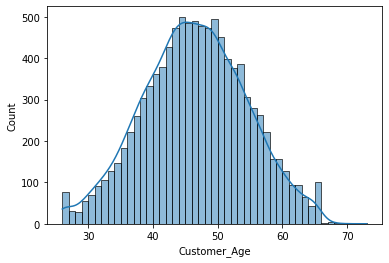

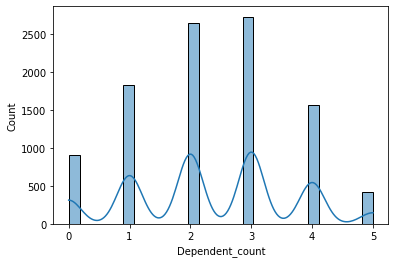

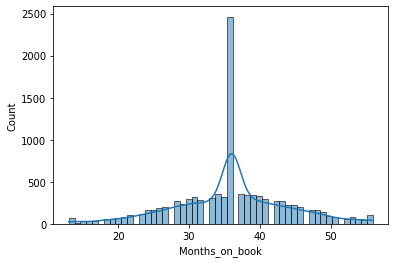

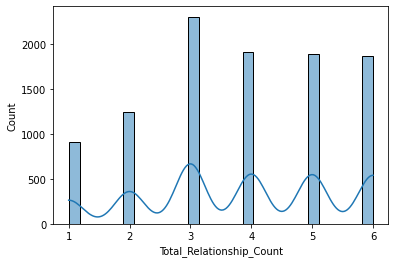

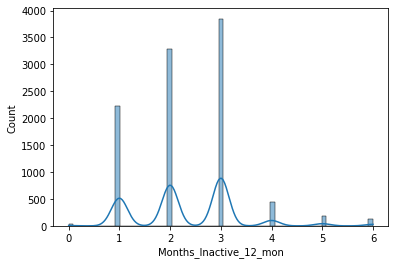

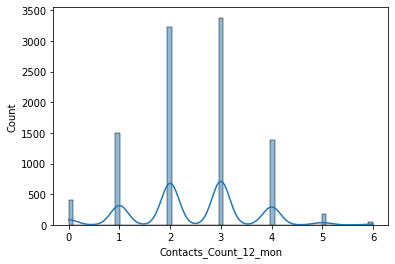

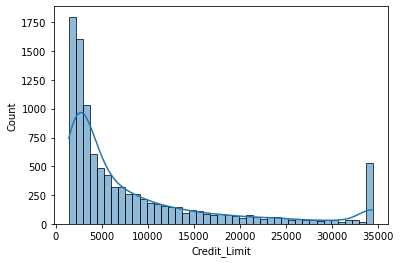

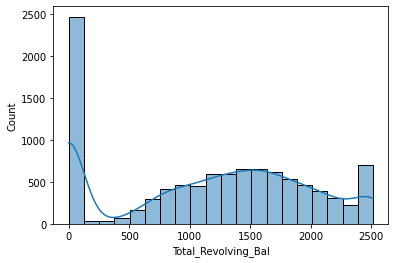

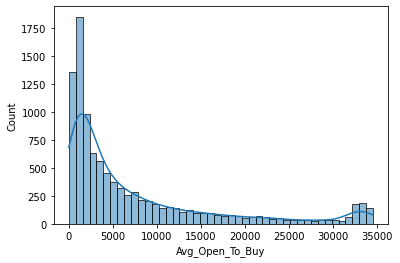

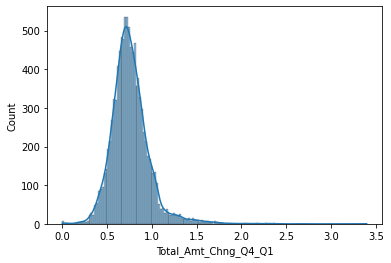

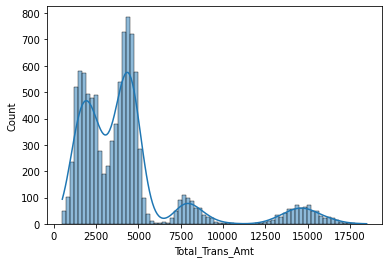

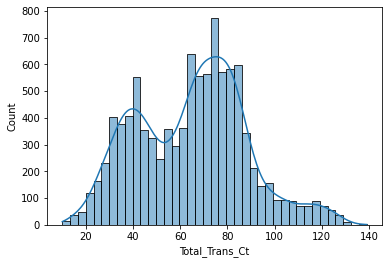

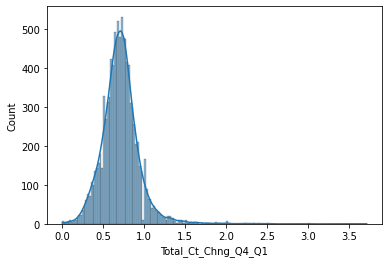

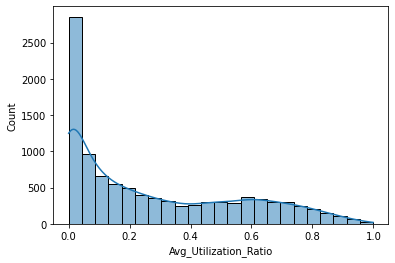

In [21]:
numerical_col = data.select_dtypes(exclude='category').columns.tolist()
for col in numerical_col:
  sns.histplot(data=data, x=col, kde=True);
  plt.show()

**Observations from Numerical Feature Analysis**

Customer_Age is normally distributed.

Most customers have 3 dependents followed by customers with 2 and 1 dependents.

Months_on_book - Data looks well distributed on both sides. There are customers who are assocated with bank for almost 5 years.

Total_Relationship_Count - Around 1/4th of customers have 3 relationships with bank. Customers with 4,5 and 6 relationships are almost equal in numbers.

One third of the customers have not used the card for 3 months in last 12 months. There are a 1% subset of customers who have not used their cards for 6 months in last 12 months.

~30% customers had interacted 3 times with bank staff in last 12 months, followed by customers interacted twice. Very small percentage of customers have interacted for 6 times in last 12 months.

From our domain knowledge we know that some customers will have higher credit limit compared to others. The data is expected to be right skewed given the domain.looks 

Total_Revolving_Bal - The data is skewed to the left. From the domain knowledge we know that customers may or may not use the revolving credit / balance feature on their cards.

Avg_Open_To_Buy - The data is heavily right skewed. From our domain knowledge, we know that customers may or may not utilize the entire limit available on card. The data looks normal for the domain.

Total_Amt_Chng_Q4_Q1 - The data is skewed to the right. The variable represents a comparision between utilisation in Q4 as compared to Q1. The customers spending patterns change and so the skew is quite expected and not surprising or abnormal.

Total_Trans_Amt - Some customers are likely to spend more on credit card than others. The data is skewed to the right with 4 peaks/modes. The skewing in this column is very much expected.

Total_Trans_Ct - The data largely looks balanced with 2 peaks. Some customers use their credit cards more than others and we cannot expect a ideal normal distribution for this column.

Total_Count_Chng_Q4_Q1 - This graph looks very similar to that of Total_Amt_Chng_Q4_Q1. They both are skewed to the right, peak at the same point. The min and max values listed in the statistical summary are very close as well. Could be because both these columns are rations. 

Avg_Utilization_Ratio - The data is skewed to the right. Given that some customers are likely to spend more on credit card, the skewing is expected. 




















# Outlier detection using Boxplot

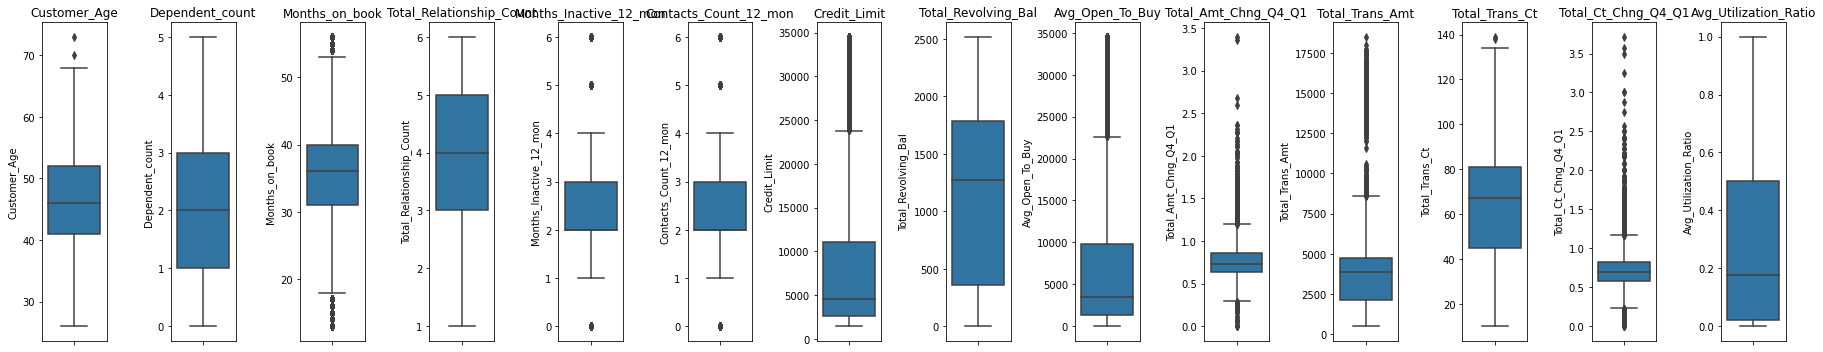

In [22]:
#Let us plot boxplots for all the numerical columns
plt.figure(figsize=(25,5))

for i, variable in enumerate(numerical_col):
    plt.subplot(1,14,i+1)
    sns.boxplot(y=data[variable], orient='h')
    plt.tight_layout()
    plt.title(variable)

plt.show()

**Observations on Outliers derived from Box Plots**

Customer_Age has outliers. From the statistical summary, the max value in the column is only 73. So no treatment is required.

Months_on_book - There are outliers on both sides. As per the statistical summary, the max time that the customer was associated with the bank is ~5 years and the minimum is ~1 year. Knowing the domain, this is quite expected and does not need any outlier treatment. We might want to confirm that the customers who have been with the bank longer are older customers.

Months_Inactive_12_mon - There are outliers on both ends. However looking at the statistical summary the range is very small - 0 to 6 months. Again knowing the domain, this is quite expected. 

Contacts_Count_12_mon - Outliers exist on both ends. However looking at the statistical summary the range is very small - 0 to 6. Again knowing the domain, this is quite expected and does not call for any outlier treatment.

Credit_Limit - Outliers at the higher end. From our domain knowledge we know that some customers will have higher credit limit compared to others. Again, we could validate that the customers with higher limit are older as fresh grads won't start out with a high credit limit as it takes a while to build up the credit history. 

Avg_Open_To_Buy - Open to Buy refers to the amount left on the credit card to use (Average of last 12 months). This column has outliers on the higher side. From our domain knowledge, we know that customers may or may not utilize the entire limit available on card. However we can double check that the customers with high Avg_Open_To_Buy have higher Credit_Limit and are older. 

Total_Amt_Chng_Q4_Q1 - Outliers exist on either ends. The variable represents a comparision between utilisation of Q4 as compared to Q1. The statistical summary indicates that the values range between 0 to 3.4 - a very small range. Given the domain, this is expected where the same amount wont be spent every quarter - many factors contribute to the amount spent. The data looks legit/expected and no outlier treatment is required.

Total_Trans_Amt (in 12 months) - Outliers exist on the higher end. Some customers are likely to spend more on credit card. We can verify that the customers who spend more have a higher credit limit. 

Total_Trans_Ct (in 12 months) - Outliers exist on the higher end. It is again expected that some customers use their card more than others. As per the statistical summary, the values range from 10 to 139. Again this is expected and perhaps we can verify that the customers who use the card the most incur more charges... This isn't necessarily true either - higher transaction count does not have to add up to higher transaction amounts. For example, 10 trips to the grocery store (10 transactions) wont add up to one roundtrip airfare for the family(1 transaction).

Total_Count_Chng_Q4_Q1 - Outliers exist on either ends. The variable represents a comparision between number of transactions in Q4 as compared to Q1. The statistical summary indicates that the values range between 0 to 3.7 - a very small range. Given the domain, this is expected most users wont use the credit card the exact same number of times within a quarter - many factors contribute to the amount spent. The data looks legit/expected and no outlier treatment is required.



# Categorical Feature Analysis

In [23]:
# Below code draws count plots for each categorical feature along with the percentages

def perc_on_bar(data: pd.DataFrame, category_columns, target, hue=None, perc=True):
    '''
    The function takes a category column as input and plots bar chart with percentages on top of each bar
    '''
    
    subplot_cols = 2
    subplot_rows = int(len(category_columns)/2 + 1)
    plt.figure(figsize=(16,5*subplot_rows))
    for i, col in enumerate(category_columns):
        plt.subplot(subplot_rows,subplot_cols,i+1)
        order = data[col].value_counts(ascending=False).index  # Data order  
        ax=sns.countplot(data=data, x=col, palette = 'crest', order=order, hue=hue);
        for p in ax.patches:
            percentage = '{:.1f}%\n({})'.format(100 * p.get_height()/len(data[target]), p.get_height())
            # Added percentage and actual value
            x = p.get_x() + p.get_width() / 2
            y = p.get_y() + p.get_height() + 40
            if perc:
                plt.annotate(percentage, (x, y), ha='center', color='black', fontsize='medium'); # Annotation on top of bars
            plt.xticks(color='black', fontsize='medium', rotation= (-90 if col=='region' else 0));
            plt.tight_layout()
            plt.title(col.capitalize() + ' Percentage Count Plots \n\n')


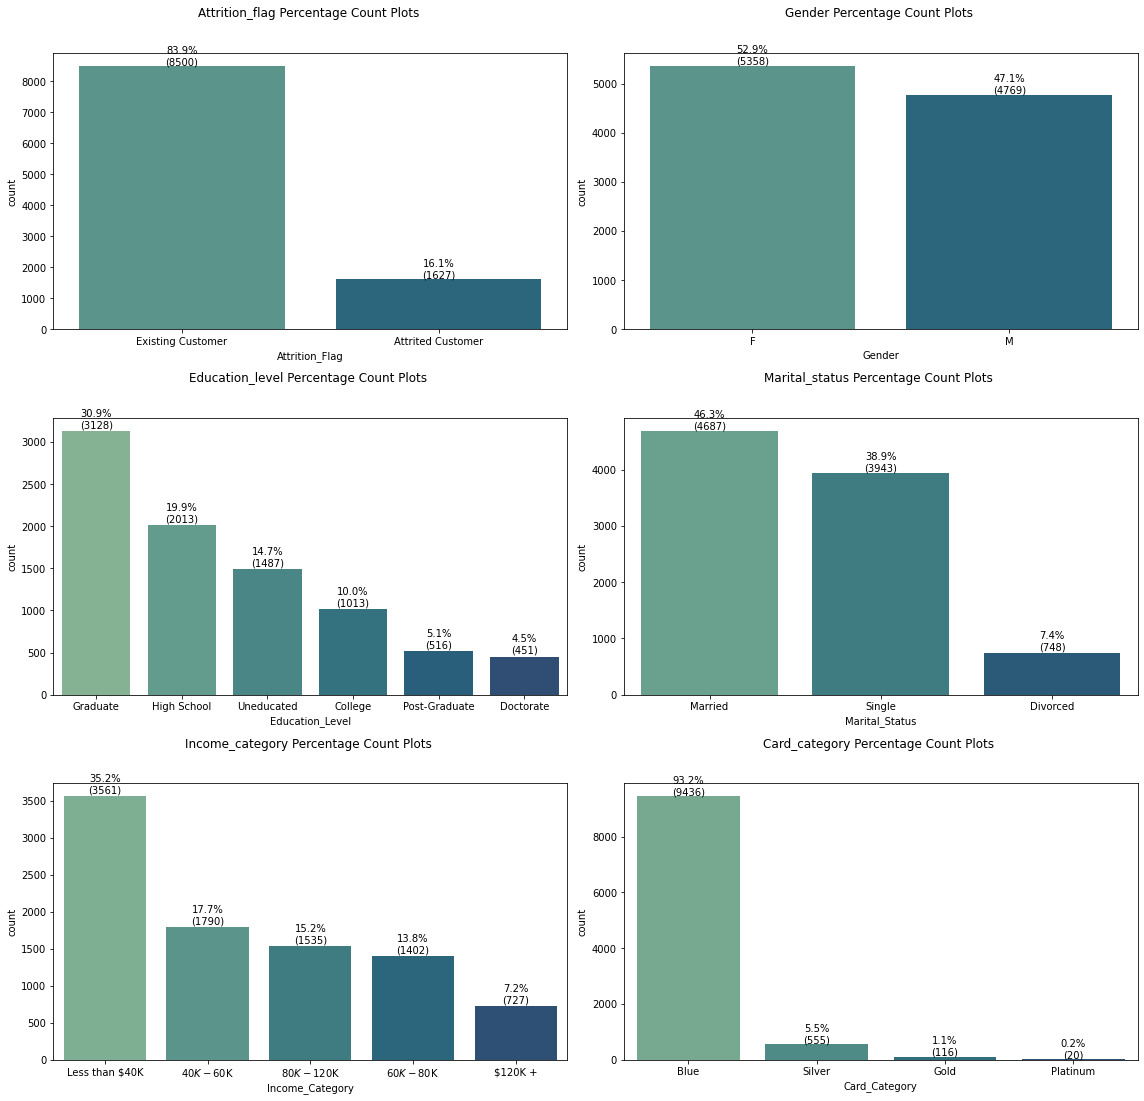

In [24]:
perc_on_bar(data, string_columns, 'Attrition_Flag')

**Observations from Categorical Feature Analysis**

Target variable shows 83.9% customers are existing and 16.1% are attrited.

Number of Female customers is higher than Male customers.

Most customers are Graduate followed by High School.

Around 46% customers are married.

35% of them make less than 40K followed by ~18% of them who make between 40 to 60K.

Most customers in the dataset have "Blue" Card. There are very few customers who use "Gold" and "Platinum" Cards.






# Bivariate Analysis
Goal of Bi-variate analysis is to find inter-dependencies between features.

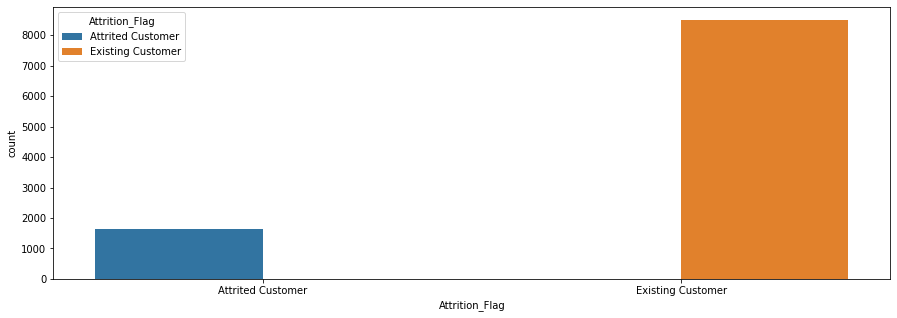

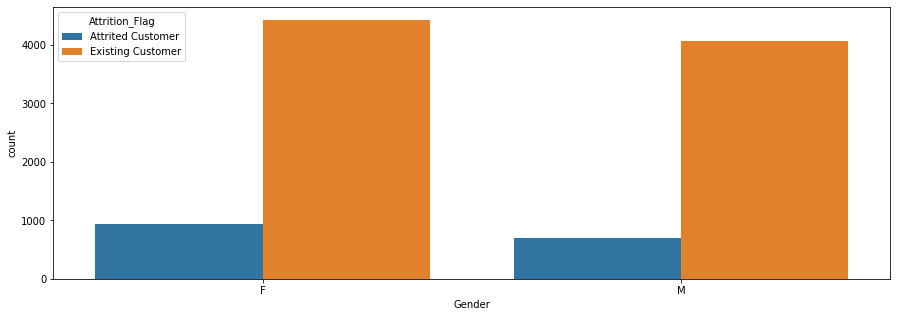

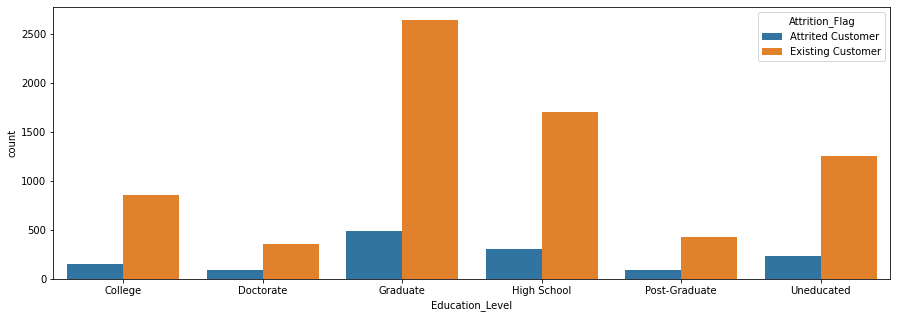

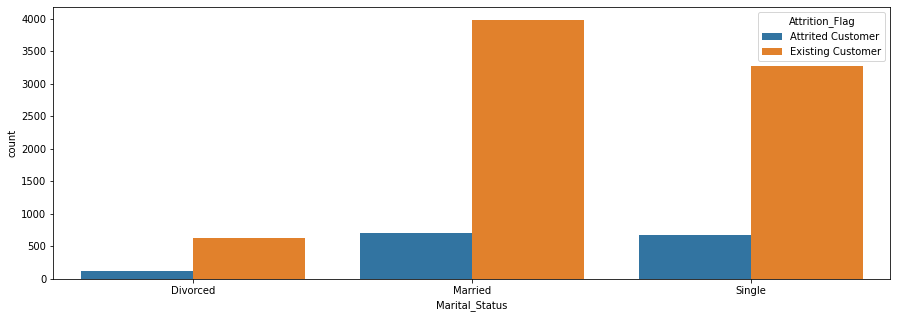

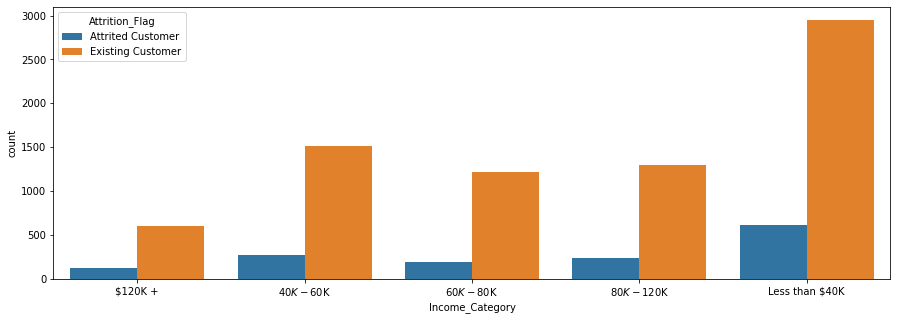

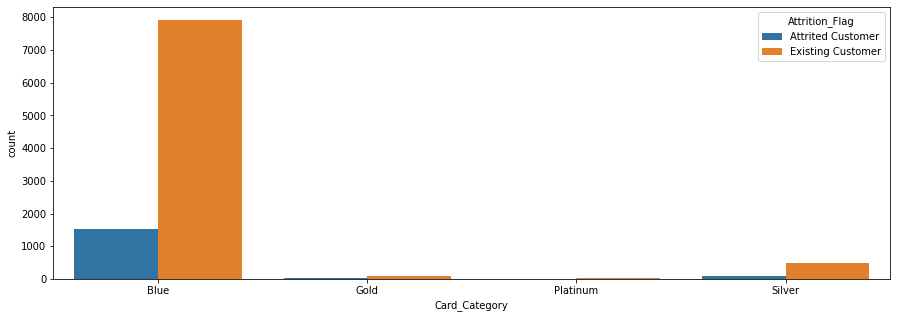

In [25]:
#Let us draw count plots of the categorical variables grouped by the dependent/target variable (Attrition_Flag)
for col in string_columns:
  plt.figure(figsize=(15,5))
  sns.countplot(data=data, x=col, hue='Attrition_Flag');
  plt.show()

**Observations drawn from the Bivariate Analysis of the Categorical variables**

Number of Male Customers closing the Credit Card account is slighlty lesser than Female Customers.

People with Doctorate degree tend to leave the Credit Card program more than other Education_Levels. Education_Level other than Doctorate do not show significant impact on attrition.

Married Customers are less likely to close the credit card compared to other Statuses.

Customers with income greater than 120k and less than 40k are more likely to close the credit card. Customers within income range of  60k and 80k are less likely to attrite.

Platinum card members are most likely to close the credit card compared to other categories.



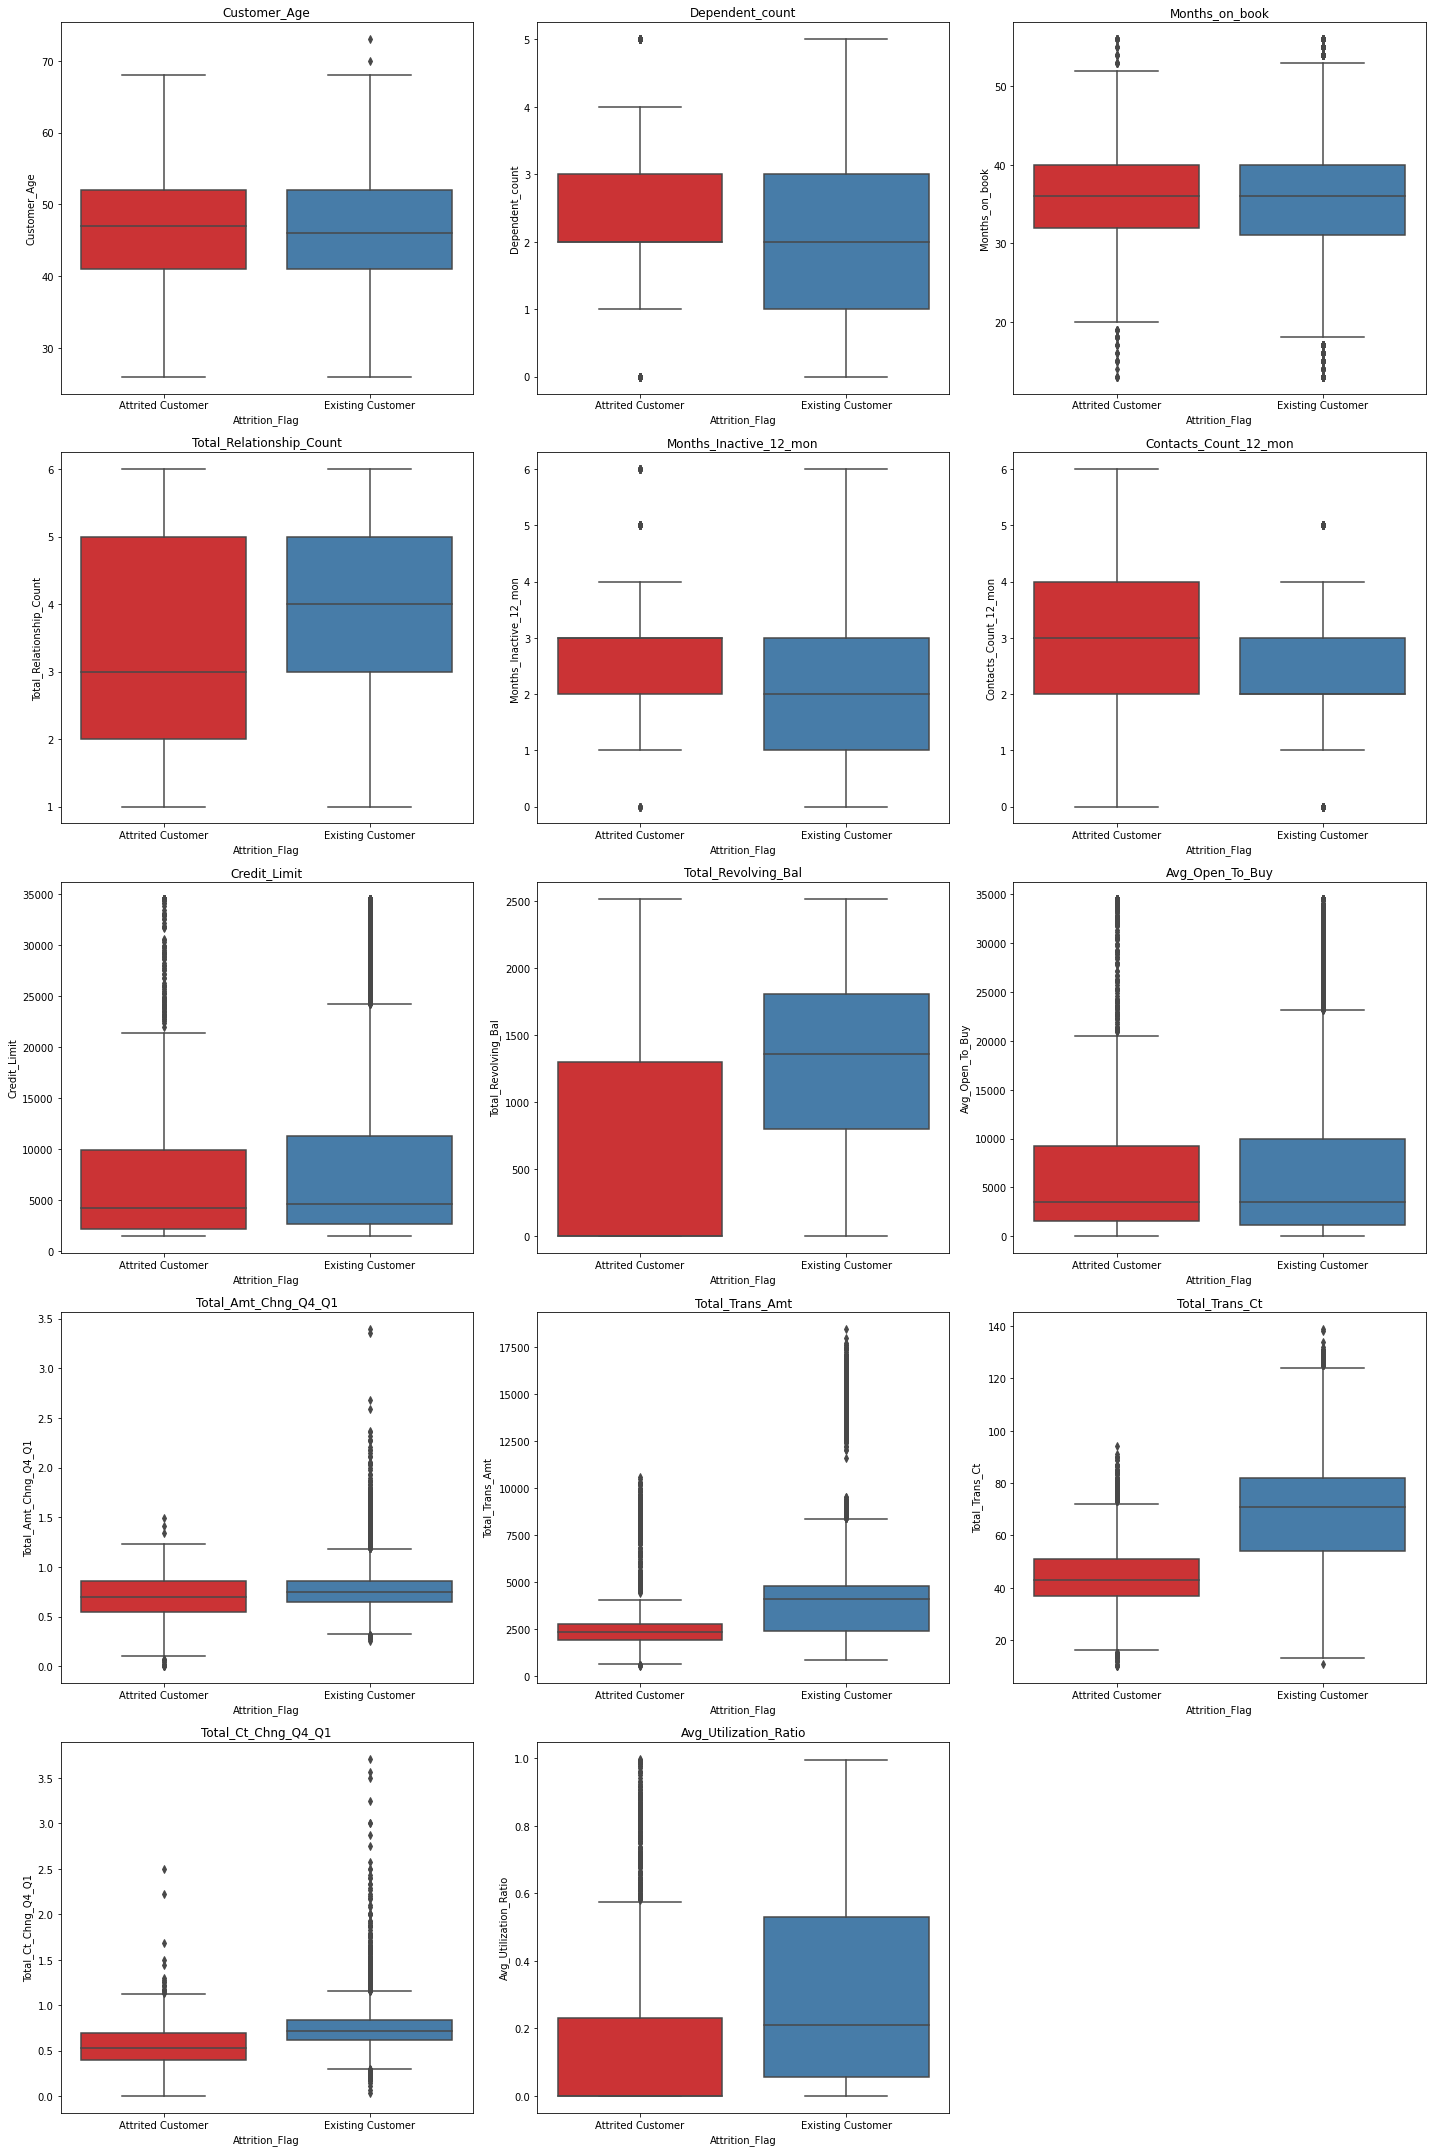

In [26]:
# #Let us draw box plots of the numerical columns against the dependent/target variable (Attrition_Flag)
plt.figure(figsize=(20,30))
for i, variable in enumerate(numerical_col):
                     plt.subplot(5,3,i+1)
                     sns.boxplot(data["Attrition_Flag"],data[variable],palette="Set1")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

**Observations drawn from the Bivariate Analysis of the Numerical variables**

Existing customers have slightly larger Credit_Limits.

Existing customers have larger Revolving_Balance.

Transaction_Amounts and transaction counts of existing customers are higher than attrited customers, which indicates some customers may be using other credit cards or really don't use credit cards at all.  

Average Utilisation is higher in existing customers.

The number of times the bank staff contacted the attrited customers is higher than the existing customers.

Customer_Age, Avg_to_Buy, Months_Inactive_12_mon and Months_on_Book do not seem to have an impact on attrition.



# Multi-variate Analysis
Pair Plot of the numerical columns hued by Attrition_Flag

In [27]:
## Below plot shows correlations between the numerical features in the dataset

plt.figure(figsize=(20,20));
sns.set(palette="nipy_spectral");
sns.pairplot(data=data, hue='Attrition_Flag', corner=True);
plt.show()

**Observations**
As we have seen during bivariate analysis there are no clear indicators of attrition as all variables show similar data for both existing customers and attrited customers.

# Heatmap to plot the correlations between the numerical columns.

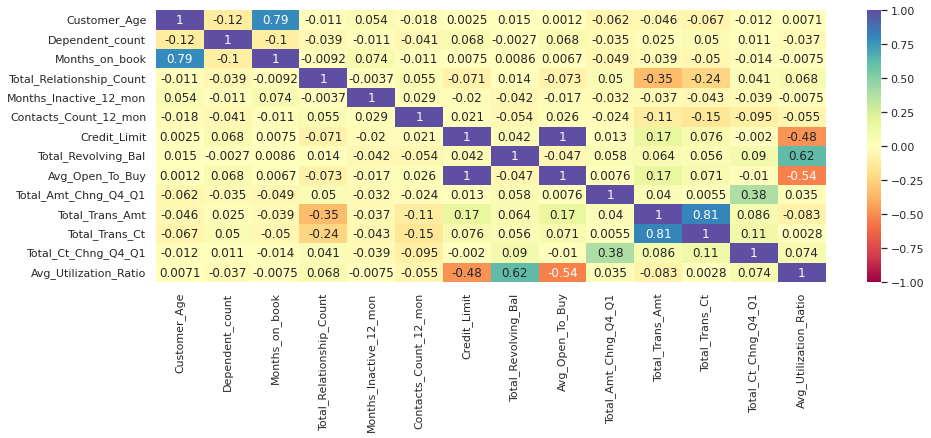

In [28]:
plt.figure(figsize=(15,5))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, cmap='Spectral');

**Observations**

Avg_Open_To_Buy is highly correlated to Credit_Limit.

Total_Trans_Amt is highly correlated to Total_Trans_Ct as they are value and volume representation of Transactional Data.

Avg_Utilization_Ratio shows strong correlation with Total_Revolving_Bal.

Customer_Age as expected is strongly correlated to Months_on_book.

Avg_Utilization_Ratio is negatively correlated to Credit_Limit and Avg_Open_To_Buy.



# Outlier Treatment

**When analyzing the outliers indicated by the box plots, we noted 5 columns for further analysis. Recap of the observations of the 5 columns below.**

**Months_on_book** - There are outliers on both sides. As per the statistical summary, the max time that the customer was associated with the bank is ~5 years and the minimum is ~1 year. Knowing the domain, this is quite expected. We could check if the customers who have higher values are older customers.  
 
**Credit_Limit** - Outliers at the higher end. From our domain knowledge we know that some customers will have higher credit limit compared to others. Again, we could validate that the customers with higher limit are older as fresh grads won't start out with a high credit limit as it takes a while to build up the credit history. 

**Avg_Open_To_Buy** - Open to Buy refers to the amount left on the credit card to use (Average of last 12 months). This column has outliers on the higher side. From our domain knowledge, we know that customers may or may not utilize the entire limit available on card. However we can double check that the customers with high Avg_Open_To_Buy have higher Credit_Limit and are older. 

**Total_Trans_Amt (in 12 months)** - Outliers exist on the higher end and that is justifiable as some customers are likely to spend more than others. We can verify that the customers who spend more have a higher credit limit. 

**Total_Trans_Ct (in 12 months)** - Outliers exist on the higher end. It is again expected that some customers use their card more than others. As per the statistical summary, the values range from 10 to 139. Again this is expected and perhaps we can verify that the customers who use the card the most incur more charges. This doesn't hold good in every case - higher transaction count does not have to add up to higher transaction amounts. For example, 10 trips to the grocery store (10 transactions) wont add up to one roundtrip airfare for the family(1 transaction).




**Function to determine the lower and upper limits based on the Quantile and IQR**

In [29]:
#Determine the lower_limit and upper_limit (Formulas: Q1-1.5*IQR and Q3+1.5*IQR respectively)
def calculate_limits(data,colmn):
  # Q1 = 25th quantile
    Q1=data[colmn].quantile(0.25)
    
    # Q3 = 75th quantile
    Q3=data[colmn].quantile(0.75)
    
    # Calculating IQR
    IQR=Q3-Q1
    
    # Setting lower limit to Q1-1.5*IQR
    lower_limit = Q1 - 1.5*IQR
    if lower_limit < 0:
        lower_limit = 0

    # Setting upper limit to Q3+1.5*IQR
    upper_limit = Q3 + 1.5*IQR
    
    return lower_limit, upper_limit

In [30]:
# Let us calculate the lower and upper limits of Months_on_book using quantiles.
lower_limit, upper_limit = calculate_limits(data,'Months_on_book')
print ('Lower cap for Months_on_book',lower_limit)
print ('Upper cap for Months_on_book', upper_limit)

Lower cap for Months_on_book 17.5
Upper cap for Months_on_book 53.5


In [31]:
#Let us get the number of rows where Months_on_book>53.5 & let us see what values those rows hold.
temp = data[data['Months_on_book']>53.5]
print('Number of rows with more than 53.5 months_on_book:', temp.shape[0])
temp['Months_on_book'].value_counts(1)

Number of rows with more than 53.5 months_on_book: 198


56    0.520202
54    0.267677
55    0.212121
Name: Months_on_book, dtype: float64

None of the 198 rows have a Month_on_book that is significantly higher than the upper limit. There are merely 1 to 2.5 more than the upper limit. 

In [32]:
#Let us check the age of the customers who have higher values in Months_on_book
#Most likely older clients are the ones who have been with the bank for longer compared to customers in 20s.
temp['Customer_Age'].value_counts()

65    59
63    25
61    24
62    24
60    23
64    21
59     8
58     7
67     3
66     2
68     1
70     1
Name: Customer_Age, dtype: int64

In [33]:
#Let us get the number of rows where Months_on_book<17.5 & let us see what values those rows hold.
temp = data[data['Months_on_book']<17.5]
print('Number of rows with less than 17.5 in months_on_book:', temp.shape[0])
temp['Months_on_book'].value_counts(1)

Number of rows with less than 17.5 in months_on_book: 188


13    0.372340
17    0.207447
15    0.180851
16    0.154255
14    0.085106
Name: Months_on_book, dtype: float64

Majority of these customers have been with the bank for atleast 13 months (a year).  Also customers new to the bank do not have to be younger as they could be customers who recently transfered from a different bank. So age is not a relevant check for the customers with Months_on_book below 17.5. 

**Bottom Line - Outlier Treatment on Months_on_book**

Given the domain, these outliers are expected and do not warranty any treatment.

In [34]:
# Let us calculate the lower and upper limits of Credit_limit using quantiles.
lower_limit, upper_limit = calculate_limits(data,'Credit_Limit')
print ('Lower cap for Credit_limit',lower_limit)
print ('Upper cap for Credit_limit', upper_limit)

Lower cap for Credit_limit 0
Upper cap for Credit_limit 23836.25


In [35]:
#Let us get the number of rows where Credit_Limit > 24K & let us see what values those rows hold.
temp = data[data['Credit_Limit']>24000]
print('Number of rows with more than 24k in Credit_Limit:', temp.shape[0])
temp['Credit_Limit'].value_counts(1)

Number of rows with more than 24k in Credit_Limit: 958


34516.0    0.530271
31501.0    0.002088
30210.0    0.002088
26792.0    0.002088
32535.0    0.002088
             ...   
32676.0    0.001044
32446.0    0.001044
28634.0    0.001044
32658.0    0.001044
29663.0    0.001044
Name: Credit_Limit, Length: 442, dtype: float64

53% of these customers have a Credit_Limit of 34K. Which is good 10K above the upper_limit, however this is quite expected given the domain.

In [36]:
#Let us take a look at the age of these customers to make sure there aren't many in the 20s. As it takes a while to build up
#credit history and get a good credit limit.
temp['Customer_Age'].value_counts()

51    60
44    58
49    57
50    57
46    52
52    50
43    50
48    49
41    47
47    46
45    44
42    43
39    36
40    34
38    33
55    33
53    29
57    24
54    23
56    14
36    12
34    12
58    11
37    11
60    10
31    10
33     9
35     9
32     8
59     7
62     6
61     3
63     2
28     2
29     2
26     2
30     1
65     1
27     1
Name: Customer_Age, dtype: int64

Out of 958 customers we only got about 9 of them that are between 26 and 29. Again expected and this is less than 1% of the customer base that has a high credit limit.

**Bottom Line - Credit_Limit - Outlier Treatment**

The outliers do not warranty any treatment.

In [37]:
# Let us calculate the lower and upper limits of Avg_Open_To_Buy using quantiles.
lower_limit, upper_limit = calculate_limits(data,'Avg_Open_To_Buy')
print ('Lower cap for Avg_Open_To_Buy',lower_limit)
print ('Upper cap for Avg_Open_To_Buy', upper_limit)

Lower cap for Avg_Open_To_Buy 0
Upper cap for Avg_Open_To_Buy 22660.75


In [38]:
#Let us get the number of rows where Avg_Open_To_Buy > 23K & let us see what values those rows hold.
temp = data[data['Avg_Open_To_Buy']>23000]
print('Number of rows with more than 23k in Avg_Open_To_Buy:', temp.shape[0])
temp['Avg_Open_To_Buy'].value_counts(1)

Number of rows with more than 23k in Avg_Open_To_Buy: 941


34516.0    0.104145
31999.0    0.027630
32669.0    0.003188
32864.0    0.003188
23981.0    0.003188
             ...   
32623.0    0.001063
28701.0    0.001063
24024.0    0.001063
30858.0    0.001063
33425.0    0.001063
Name: Avg_Open_To_Buy, Length: 760, dtype: float64

In [39]:
#Let us make sure there aren't any rows where Avg_Open_To_Buy is greater than the allowed credit limit. 
#Existance of such rows indicate erroneous data.
temp1 = temp[temp['Avg_Open_To_Buy'] > temp['Credit_Limit']]
temp1.shape[0]

0

In [40]:
#Let us confirm that majority of these customers have a high credit limit. 
temp['Credit_Limit'].value_counts(1)

34516.0    0.539851
23981.0    0.004251
30210.0    0.002125
26437.0    0.002125
32535.0    0.002125
             ...   
31945.0    0.001063
27710.0    0.001063
26856.0    0.001063
26218.0    0.001063
29663.0    0.001063
Name: Credit_Limit, Length: 423, dtype: float64

53% of the customers have a high credit limit of 34.5K. A good indicator that these are legit observations.

**Bottom Line - Avg_Open_To_Buy - Outlier Treatment**

The outliers do not warranty any treatment.

In [41]:
# Let us calculate the lower and upper limits of Total_Trans_Amt using quantiles.
lower_limit, upper_limit = calculate_limits(data,'Total_Trans_Amt')

print ('Lower cap for Total_Trans_Amt',lower_limit)
print ('Upper cap for Total_Trans_Amt', upper_limit)

Lower cap for Total_Trans_Amt 0
Upper cap for Total_Trans_Amt 8619.25


In [42]:
#Let us get the number of rows where Total_Trans_Amt> 9K & let us see what values those rows hold.
temp = data[data['Total_Trans_Amt']>9000]
print('Number of rows with more than 9k in Total_Trans_Amt:', temp.shape[0])
temp['Total_Trans_Amt'].value_counts(1)

Number of rows with more than 9k in Total_Trans_Amt: 819


14738    0.003663
14802    0.003663
14220    0.003663
13988    0.003663
13360    0.002442
           ...   
13299    0.001221
9177     0.001221
13853    0.001221
13958    0.001221
10294    0.001221
Name: Total_Trans_Amt, Length: 747, dtype: float64

In [43]:
#Let us verify that these rows have optimal values in the Total_Trans_Ct columns. 
temp['Total_Trans_Ct'].min()

50

**This is total amount spent over a period of 12 months. So quite natural to have a wide range of values. The same goes for Total_Trans_Ct column as well**

**Bottom Line - Total_Trans_Amt & Total_Trans_Ct - Outlier Treatment**

The outliers do not warranty any treatment.

# Customer Profiling

**Let us create a dataset with just the attrited customers.**

In [44]:
temp = data.copy()
temp['Attrition_Flag'] = temp['Attrition_Flag'].replace({"Attrited Customer": 1, "Existing Customer": 0})
temp = temp[temp['Attrition_Flag'] ==1]
temp.describe().T


,count,mean,std,min,25%,50%,75%,max
Attrition_Flag,1627.0,1.000000,0.000000,1.0,1.0000,1.000,1.000,1.000
Customer_Age,1627.0,46.659496,7.665652,26.0,41.0000,47.000,52.000,68.000
Dependent_count,1627.0,2.402581,1.275010,0.0,2.0000,2.000,3.000,5.000
Months_on_book,1627.0,36.178242,7.796548,13.0,32.0000,36.000,40.000,56.000
Total_Relationship_Count,1627.0,3.279656,1.577782,1.0,2.0000,3.000,5.000,6.000
Months_Inactive_12_mon,1627.0,2.693301,0.899623,0.0,2.0000,3.000,3.000,6.000
Contacts_Count_12_mon,1627.0,2.972342,1.090537,0.0,2.0000,3.000,4.000,6.000
Credit_Limit,1627.0,8136.039459,9095.334105,1438.3,2114.0000,4178.000,9933.500,34516.000
Total_Revolving_Bal,1627.0,672.822987,921.385582,0.0,0.0000,0.000,1303.500,2517.000
Avg_Open_To_Buy,1627.0,7463.216472,9109.208129,3.0,1587.0000,3488.000,9257.500,34516.000


In [45]:
temp.describe(exclude=np.number).T

,count,unique,top,freq
Gender,1627,2,F,930
Education_Level,1371,6,Graduate,487
Marital_Status,1498,3,Married,709
Income_Category,1440,5,Less than $40K,612
Card_Category,1627,4,Blue,1519


**Attrition Indicators**

The attrited customers ---->

   
   are primarily in the age group of 41 to 52

   have been with the bank between 2.5 to 3.5 years


   have not used the credit card for 2 to 3 months in the last 12 months


   have a credit limit between ~2K and ~10K


   have a revolving balance between 0 and 1.3K


   spend anywhere between ~1.9K to ~2.7K annually


   use the credit card between 37 to 51 times annually


   majority of them are married female graduates with income less than 40K.


# Data Preparation for Modeling

In [46]:
#Encoding the target variable
data['Attrition_Flag'] = data['Attrition_Flag'].replace({"Attrited Customer": 1, "Existing Customer": 0})

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition_Flag            10127 non-null  int64   
 1   Customer_Age              10127 non-null  int64   
 2   Gender                    10127 non-null  category
 3   Dependent_count           10127 non-null  int64   
 4   Education_Level           8608 non-null   category
 5   Marital_Status            9378 non-null   category
 6   Income_Category           9015 non-null   category
 7   Card_Category             10127 non-null  category
 8   Months_on_book            10127 non-null  int64   
 9   Total_Relationship_Count  10127 non-null  int64   
 10  Months_Inactive_12_mon    10127 non-null  int64   
 11  Contacts_Count_12_mon     10127 non-null  int64   
 12  Credit_Limit              10127 non-null  float64 
 13  Total_Revolving_Bal       10127 non-null  int6

In [48]:
data.head(5)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [49]:
X = data.drop('Attrition_Flag', axis=1)
y = data['Attrition_Flag']


In [50]:
data['Attrition_Flag'].value_counts(1)

0    0.83934
1    0.16066
Name: Attrition_Flag, dtype: float64

84% of observations belong to existing customers (mapped to 0) and 16% of the observations belong to attrited customers (mapped to 1), and this ratio will have to be preserved in the training, validation and the testing datasets. 

# Splitting data into 3 sets - Training, Validation and Testing. 

In [51]:
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.20, random_state=1, stratify=y
)

# Then we split the temporary set into train and validation
X_train, X_val, y_train, y_val = train_test_split(
    X_temp,
    y_temp,
    test_size=0.25,
    random_state=1,
    stratify=y_temp,  # set the weighting feature on
)
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 19) (2026, 19) (2026, 19)


**Verifying that the ratio of the classes in the target variable has been preserved across the 3 datasets.**

In [52]:
y_train.value_counts(1)

0    0.839342
1    0.160658
Name: Attrition_Flag, dtype: float64

In [53]:
y_val.value_counts(1)

0    0.839092
1    0.160908
Name: Attrition_Flag, dtype: float64

In [54]:
y_test.value_counts(1)

0    0.839585
1    0.160415
Name: Attrition_Flag, dtype: float64

# Imputation

**In order to avoid Data Leakage, Imputation is being done after the data has been split into Train, Validation and Testing datasets.**

In [55]:
#The 3 columns with missing data are categorical and hence using the mode(most-frequent) value to fill in the missing values.
cols_to_impute = ['Education_Level','Income_Category','Marital_Status']
imputer = SimpleImputer(strategy='most_frequent')

# fit the imputer on the training set and transform it on all the 3 - training, validation and testing datasets.
X_train[cols_to_impute] = imputer.fit_transform(X_train[cols_to_impute])
X_val[cols_to_impute] = imputer.transform(X_val[cols_to_impute])
X_test[cols_to_impute] = imputer.transform(X_test[cols_to_impute])


In [56]:
# Verifiying that no column has missing values in training, validation or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64
------------------------------
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal       

# Ordinal Encoding

**We have 3 categorical columns (Card_Category, Education_Level and Income_Category) where ranking/order matters**.  

Listing the unique values in the 3 columns to come up with the ranking/order.

In [57]:
X_train['Card_Category'].unique()

['Blue', 'Silver', 'Gold', 'Platinum']
Categories (4, object): ['Blue', 'Gold', 'Platinum', 'Silver']

In [58]:
X_train['Education_Level'].unique()

array(['Graduate', 'High School', 'Uneducated', 'College', 'Doctorate',
       'Post-Graduate'], dtype=object)

In [59]:
X_train['Income_Category'].unique()

array(['$120K +', 'Less than $40K', '$80K - $120K', '$60K - $80K',
       '$40K - $60K'], dtype=object)

In [60]:
# Create order categories to instruct how ordinal encoder should rank the values.
eduction_order = ['Uneducated','High School','College','Graduate','Post-Graduate','Doctorate']
card_order = ["Blue", "Silver", "Gold", 'Platinum']
income_order = ['Less than $40K','$40K - $60K', '$60K - $80K','$80K - $120K', '$120K +']

# Assign attributes to different lists based on the values
column_to_cat = {
    "Education_Level": eduction_order,
    "Card_Category": card_order,
    "Income_Category": income_order
    
}

# Initialize the 3 encoders - if we encounter values in validation or testing data sets
# that do not exist in the training set, the encoder is configured to raise an error (handle_unknown="error") 
encoder_education = OrdinalEncoder(categories=[eduction_order],handle_unknown="error")
encoder_card = OrdinalEncoder(categories=[card_order],handle_unknown="error")
encoder_income = OrdinalEncoder(categories=[income_order],handle_unknown="error")

#Fit the encoder on the training set and transform it on all the 3 datasets - training, validation and testing.
X_train['Education_Level'] = encoder_education.fit_transform(X_train[['Education_Level']])
X_train['Card_Category'] = encoder_card.fit_transform(X_train[['Card_Category']])
X_train['Income_Category'] = encoder_income.fit_transform(X_train[['Income_Category']])

X_val['Education_Level'] = encoder_education.transform(X_val[['Education_Level']])
X_val['Card_Category'] = encoder_card.transform(X_val[['Card_Category']])
X_val['Income_Category'] = encoder_income.transform(X_val[['Income_Category']])

X_test['Education_Level'] = encoder_education.transform(X_test[['Education_Level']])
X_test['Card_Category'] = encoder_card.transform(X_test[['Card_Category']])
X_test['Income_Category'] = encoder_income.transform(X_test[['Income_Category']])


# Verifiying that the 3 columns have been encoded. 

In [61]:
X_test['Card_Category'].value_counts()

0.0    1876
1.0     119
2.0      26
3.0       5
Name: Card_Category, dtype: int64

**value_counts lists the grouped values in the descending order, so most frequent value is listed first. Blue cards formed the majority and we wanted it assigned the lowest order.** 

In [62]:
X_train['Education_Level'].value_counts()

3.0    2782
1.0    1228
0.0     881
2.0     618
4.0     312
5.0     254
Name: Education_Level, dtype: int64

**value_counts lists the grouped values in the descending order, so most frequent value is listed first. Graduates formed the majority of the customer base and we wanted it ranked after Uneducated(ranking=0), High School(ranking=1) and College(ranking=2)**

In [63]:
X_val['Income_Category'].value_counts()

0.0    957
1.0    361
3.0    293
2.0    279
4.0    136
Name: Income_Category, dtype: int64

**value_counts lists the grouped values in the descending order, so most frequent value is listed first. Customers making less than $40k formed the majority and we ranked this the lowest.**

Taking a look at the updated column dtype composition of the dataset. The dataset should now have 2 non-numeric columns. 

In [64]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6075 entries, 800 to 4035
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Customer_Age              6075 non-null   int64   
 1   Gender                    6075 non-null   category
 2   Dependent_count           6075 non-null   int64   
 3   Education_Level           6075 non-null   float64 
 4   Marital_Status            6075 non-null   object  
 5   Income_Category           6075 non-null   float64 
 6   Card_Category             6075 non-null   float64 
 7   Months_on_book            6075 non-null   int64   
 8   Total_Relationship_Count  6075 non-null   int64   
 9   Months_Inactive_12_mon    6075 non-null   int64   
 10  Contacts_Count_12_mon     6075 non-null   int64   
 11  Credit_Limit              6075 non-null   float64 
 12  Total_Revolving_Bal       6075 non-null   int64   
 13  Avg_Open_To_Buy           6075 non-null   floa

Gender and Marital_Status columns are still in the non-numeric format and need to be one-hot encoded. Note that SimpleImputer seems to change the dtype of a column(Marital_Status) from Category to Object. 

# One Hot Encoding

Applying onehot encoding to Gender and Marital_Status columns. We will not drop any of the resulting columns to accomodate any values that exist in the validation/testing sets but not in the training sets. 

In [65]:
X_train.columns

Index(['Customer_Age', 'Gender', 'Dependent_count', 'Education_Level',
       'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [66]:
# Create a OneHotEncoder object
onehot_encoder = OneHotEncoder(sparse=False, handle_unknown="ignore") #setting sparse to False in order to get back an array
cols_to_ohe = ['Gender','Marital_Status']

#Fit the encoder on the training set and transform it on all the 3 datasets - training, validation and testing
encoded_columns_train = onehot_encoder.fit_transform(X_train[cols_to_ohe])
# Converting the array into a dataframe
data_train_encoded = pd.DataFrame(
   encoded_columns_train,
   index=X_train.index,
   columns=onehot_encoder.get_feature_names_out(cols_to_ohe),
)
# Extract the columns that were not sent through the onehot encoder
data_other_cols_train = X_train.drop(columns=cols_to_ohe)
# Recreate the dataframe
X_train = pd.concat([data_train_encoded, data_other_cols_train], axis=1)

# Transform the validation set
encoded_columns_validation = onehot_encoder.transform(X_val[cols_to_ohe])
# Convert the array into a dataframe
data_val_encoded = pd.DataFrame(
   encoded_columns_validation,
   index=X_val.index,
   columns=onehot_encoder.get_feature_names_out(cols_to_ohe),
)
# Extract the columns that were not sent through the onehot encoder
data_other_cols_validation = X_val.drop(columns=cols_to_ohe)
# Recreate the dataframe
X_val = pd.concat([data_val_encoded, data_other_cols_validation], axis=1)


# Transform the test set
encoded_columns_test = onehot_encoder.transform(X_test[cols_to_ohe])
# Convert the array into a dataframe
data_test_encoded = pd.DataFrame(
   encoded_columns_test,
   index=X_test.index,
   columns=onehot_encoder.get_feature_names_out(cols_to_ohe),
)
# Extract the columns that were not sent through the onehot encoder
data_other_cols_test = X_test.drop(columns=cols_to_ohe)
# Recreate the dataframe
X_test = pd.concat([data_test_encoded, data_other_cols_test], axis=1)


In [67]:
#Let us take a look at the size of the dataset across the 3 partitions - we should have 3 more columns
#as Gender column has 2 unique values and Marital_Status had 3 unique values. So OneHotEncoder splits the
#Gender column into 2 and the Marital_Status column into 3. So that leaves us with 3 more columns in number.
#Neither of the encoding techniques (ordinal or onehot) should make any changes to the number of rows.
print('Training data set has {} rows and {} columns'.format(X_train.shape[0],X_train.shape[1]))
print('Validation data set has {} rows and {} columns'.format(X_val.shape[0],X_val.shape[1]))
print('Test data set has {} rows and {} columns'.format(X_test.shape[0],X_test.shape[1]))

Training data set has 6075 rows and 22 columns
Validation data set has 2026 rows and 22 columns
Test data set has 2026 rows and 22 columns


Let us inspect the columns in the dataset.

In [68]:
X_train.columns

Index(['Gender_F', 'Gender_M', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single', 'Customer_Age',
       'Dependent_count', 'Education_Level', 'Income_Category',
       'Card_Category', 'Months_on_book', 'Total_Relationship_Count',
       'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit',
       'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1',
       'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1',
       'Avg_Utilization_Ratio'],
      dtype='object')

Gender and Marital_Status columns are replaced by Gender_F, Gender_M, Marital_Status_Divorced, Marital_Status_Married and Marital_Status_Single.

In [69]:
X_train.head(5)

,Gender_F,Gender_M,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
800,0.0,1.0,0.0,0.0,1.0,40,2,3.0,4.0,0.0,...,4,3,20056.0,1602,18454.0,0.466,1687,46,0.533,0.080
498,0.0,1.0,0.0,1.0,0.0,44,1,3.0,0.0,0.0,...,2,0,2885.0,1895,990.0,0.387,1366,31,0.632,0.657
4356,0.0,1.0,0.0,1.0,0.0,48,4,1.0,3.0,0.0,...,1,2,6798.0,2517,4281.0,0.873,4327,79,0.881,0.370
407,0.0,1.0,0.0,1.0,0.0,41,2,3.0,2.0,1.0,...,2,0,27000.0,0,27000.0,0.610,1209,39,0.300,0.000
8728,0.0,1.0,1.0,0.0,0.0,46,4,1.0,1.0,1.0,...,2,3,15034.0,1356,13678.0,0.754,7737,84,0.750,0.090


Let us confirm that the dataset no longer has non-numeric columns and proceed to model building.

In [70]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6075 entries, 800 to 4035
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Gender_F                  6075 non-null   float64
 1   Gender_M                  6075 non-null   float64
 2   Marital_Status_Divorced   6075 non-null   float64
 3   Marital_Status_Married    6075 non-null   float64
 4   Marital_Status_Single     6075 non-null   float64
 5   Customer_Age              6075 non-null   int64  
 6   Dependent_count           6075 non-null   int64  
 7   Education_Level           6075 non-null   float64
 8   Income_Category           6075 non-null   float64
 9   Card_Category             6075 non-null   float64
 10  Months_on_book            6075 non-null   int64  
 11  Total_Relationship_Count  6075 non-null   int64  
 12  Months_Inactive_12_mon    6075 non-null   int64  
 13  Contacts_Count_12_mon     6075 non-null   int64  
 14  Credit

# Model Building

**Model Evaluation**

**Model evaluation criterion**

Model can make wrong predictions as:

Predicting a customer would close their credit card account and the customer doesn't - **Loss of resources**

Predicting a customer will not close their credit card account and the customer does - **Loss of opportunity**

**Which case is more important?**
Predicting a customer will not close their credit card account when the customer actually does close the card. This means this customer will not be targeted by the business team in an effort to retain and hence the bank could lose an existing customer.

**How to reduce this loss i.e reduce False Negatives?**
The company would want the recall to be maximized. Greater the recall score, higher are the chances of minimizing the False Negatives.

**BottomLine** - We want the False Negatives to be at a minimum.

**Class Weightage**

Since the frequency of class 0 (existing customers) is 84% and the frequency of class 1 (attrited customers) is %16, class 0 will become the dominant class and the algorithms will become biased towards the dominant classes. To handle this imbalanced data set, we can pass a dictionary {0:0.16,1:0.84} to the model to specify the weight of each class and the algorithms will give more weightage to class 1.

**Candidates for the 6 Classification Models**

Logistic Regression

Decision Tree

2 Bagging Classification Algorithms

  Bagging

  Random Forest

2 Boosting Classification Algorithms

  Gradient Boosting

  Xtreme Gradient Boosting


**Hyperparameter Tuning**

Let's start by building the models using KFold and cross_val_score and tune the top 3 models using RandomizedSearchCV.

Stratified K-Folds cross-validation provides dataset indices to split data into train/validation sets. Split dataset into k consecutive folds (without shuffling by default) keeping the distribution of both classes in each fold the same as the target variable. Each fold is then used once as validation while the k - 1 remaining folds form the training set.

# Model Evaluation Functions - Scoring & Confusion Matrix

In [71]:
#Function to draw the confusion matrix
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [72]:
##  Function to calculate different metric scores of the model - Accuracy, Recall, Precision and F1
def get_metrics_score(model,X,y):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store training, validation and test results
    score_list=[] 
    
    pred_X = model.predict(X)
    pred_val = model.predict(X_val)
    pred_test = model.predict(X_test)
    
    X_acc = model.score(X,y)
    val_acc = model.score(X_val,y_val)
    test_acc = model.score(X_test,y_test)
    
    X_recall = recall_score(y,pred_X)
    val_recall = recall_score(y_val,pred_val)
    test_recall = recall_score(y_test,pred_test)
    
    X_precision = precision_score(y,pred_X)
    val_precision = precision_score(y_val,pred_val)
    test_precision = precision_score(y_test,pred_test)

    X_f1 = f1_score(y,pred_X)
    val_f1 = f1_score(y_val,pred_val)
    test_f1 = f1_score(y_test,pred_test)
    
    
    score_list.extend((X_acc,test_acc,X_recall,test_recall,X_precision,test_precision,X_f1,test_f1))
        
     
    print("Accuracy on training set : ",X_acc)
    print("Accuracy on validation set : ",val_acc)
    print("Accuracy on test set : ",test_acc)
    print("Recall on training set : ",X_recall)
    print("Recall on validation set : ",val_recall)
    print("Recall on test set : ",test_recall)
    print("Precision on training set : ",X_precision)
    print("Precision on validation set : ",val_precision)
    print("Precision on test set : ",test_precision)
    print("F1 on training set : ",X_f1)
    print("F1 on validation set : ",val_f1)
    print("F1 on test set : ",test_f1)
    
    return score_list # returning the list with train and test scores

In [73]:
# Defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = []
f1_test = []

def add_score_model(score):
    '''Add scores to list so we can compare metrics generated by all the models'''   
    acc_train.append(score[0])
    acc_test.append(score[1])
    recall_train.append(score[2])
    recall_test.append(score[3])
    precision_train.append(score[4])
    precision_test.append(score[5])
    f1_train.append(score[6])
    f1_test.append(score[7])



**Function to** 

  **Build the 6 models using the data supplied** 

  **Fits the data on the model and calculates the cross validation scores by splitting the dataset into 5 folds**

  **Plots a box plot based on the cv scores calculated**



In [74]:
def build_models_calculate_cv_metrics(X,y,title_for_boxplots):
  
  models = []  # Empty list to store all the models

  # Appending models into the list
  models.append(("LogisticRegression",LogisticRegression(random_state=1)))
  models.append(("DecisionTree",DecisionTreeClassifier(random_state=1)))
  models.append(("Bagging", BaggingClassifier(random_state=1)))
  models.append(("Random forest", RandomForestClassifier(random_state=1)))
  models.append(("GBM", GradientBoostingClassifier(random_state=1)))
  models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))

  cv_scores = []  # Empty list to store all model's CV scores
  model_names = []  # Empty list to store name of the models


  # loop through all models to get the mean cross validated score
  print("\n" "Cross-Validation Performance:" "\n")

  for name, model in models:
      scoring = "recall"
      kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)  # Setting number of splits equal to 5
      cv_result = cross_val_score(
      estimator=model, X=X, y=y, scoring=scoring, cv=kfold
    )
      cv_scores.append(cv_result)
      model_names.append(name)
      print("{}: {}".format(name, cv_result.mean()))

  print("\n" "Training Performance:" "\n")

  for name, model in models:
    model.fit(X, y)
    scores = recall_score(y, model.predict(X))
    print("{}: {}".format(name, scores))

  print("\n" "Validation Performance:" "\n")

  for name, model in models:
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))

  
  plot_cv_scores(cv_scores, model_names, title_for_boxplots)

In [75]:
# Plotting boxplots based on cross validation scores
def plot_cv_scores(cv_scores, model_names, title):

  fig = plt.figure(figsize=(15, 7))

  fig.suptitle(title)
  ax = fig.add_subplot(111)

  plt.boxplot(cv_scores)
  ax.set_xticklabels(model_names)

  plt.show()

# Building the 6 Basic/Default Models and generating BoxPlots using the CV Scores


Cross-Validation Performance:

LogisticRegression: 0.4353427524856096
DecisionTree: 0.7817634746206175
Bagging: 0.7868602825745682
Random forest: 0.7694296180010466
GBM: 0.8175719518576663
Xgboost: 0.8555102040816326

Training Performance:

LogisticRegression: 0.4098360655737705
DecisionTree: 1.0
Bagging: 0.9877049180327869
Random forest: 1.0
GBM: 0.8811475409836066
Xgboost: 1.0

Validation Performance:

LogisticRegression: 0.46932515337423314
DecisionTree: 0.8282208588957055
Bagging: 0.8128834355828221
Random forest: 0.8128834355828221
GBM: 0.8588957055214724
Xgboost: 0.8773006134969326


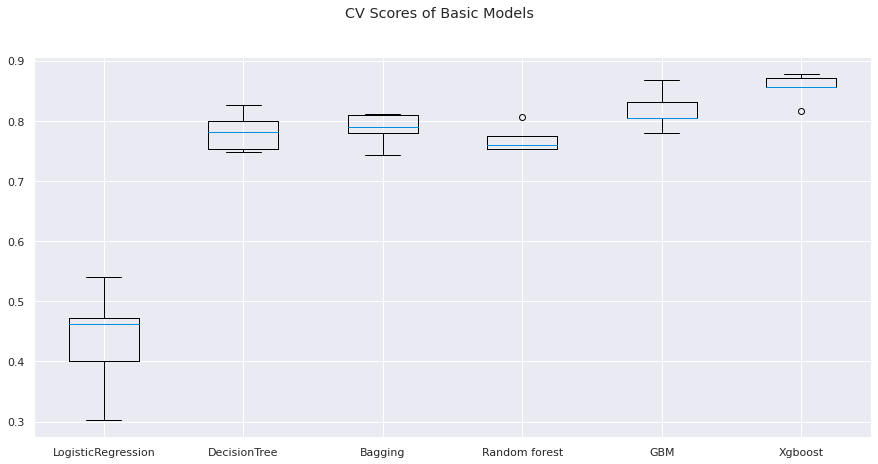

In [76]:
build_models_calculate_cv_metrics(X_train,y_train,"CV Scores of Basic Models")

**Observation - Basic Models**

XGBoost, GradientBoost and Bagging models seem to generate the best CV scores with XGBoost leading the way.



# Oversampling training data using SMOTE

In [77]:
print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)  
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))

print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Yes': 976
Before Oversampling, counts of label 'No': 5099 

After Oversampling, counts of label 'Yes': 5099
After Oversampling, counts of label 'No': 5099 

After Oversampling, the shape of train_X: (10198, 22)
After Oversampling, the shape of train_y: (10198,) 



# Building the same 6 Models using Oversampled data and generating BoxPlots using the CV Scores.


Cross-Validation Performance:

LogisticRegression: 0.8027137331870924
DecisionTree: 0.9517566241413149
Bagging: 0.9666618561065251
Random forest: 0.979212607516019
GBM: 0.9747010717927995
Xgboost: 0.9839182974465548

Training Performance:

LogisticRegression: 0.818003530103942
DecisionTree: 1.0
Bagging: 0.9976465973720338
Random forest: 1.0
GBM: 0.9792116101196313
Xgboost: 1.0

Validation Performance:

LogisticRegression: 0.8343558282208589
DecisionTree: 0.8650306748466258
Bagging: 0.8466257668711656
Random forest: 0.8650306748466258
GBM: 0.911042944785276
Xgboost: 0.9141104294478528


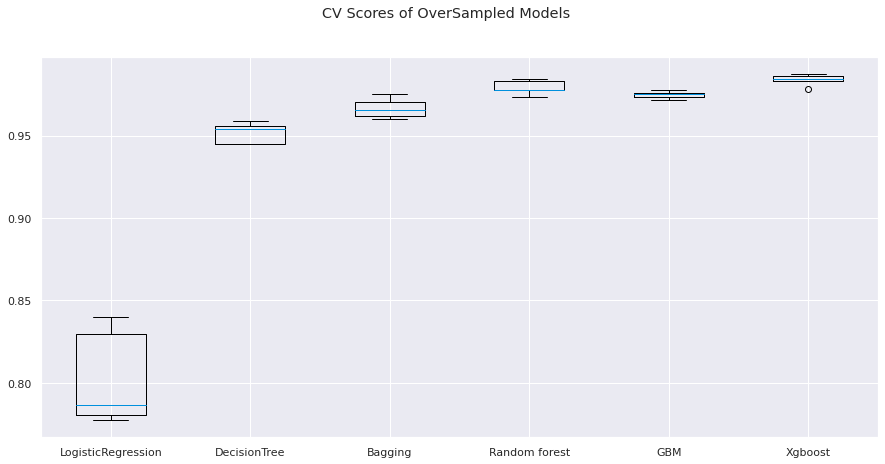

In [78]:
build_models_calculate_cv_metrics(X_train_over,y_train_over,"CV Scores of OverSampled Models")

**Observation - Models built on OverSampled data**

The cv scores of all the models improved. The recall metric against the validation set too has gained from oversampling the data.  

XGBoost, GradientBoost and RandomForest are the top performers with XGBoost continuing to be the leader.



# Undersampling training data using Random Under Sampler

In [79]:
undersampler = RandomUnderSampler(random_state=1)
X_train_under, y_train_under = undersampler.fit_resample(X_train, y_train)

# Building the same 6 Models using UnderSampled data and generating BoxPlots using the CV Scores.


Cross-Validation Performance:

LogisticRegression: 0.8145421245421245
DecisionTree: 0.888299319727891
Bagging: 0.9088173731030873
Random forest: 0.9375039246467818
GBM: 0.9416012558869703
Xgboost: 0.9518524332810048

Training Performance:

LogisticRegression: 0.826844262295082
DecisionTree: 1.0
Bagging: 0.9907786885245902
Random forest: 1.0
GBM: 0.9795081967213115
Xgboost: 1.0

Validation Performance:

LogisticRegression: 0.8343558282208589
DecisionTree: 0.9079754601226994
Bagging: 0.9325153374233128
Random forest: 0.9325153374233128
GBM: 0.9601226993865031
Xgboost: 0.9662576687116564


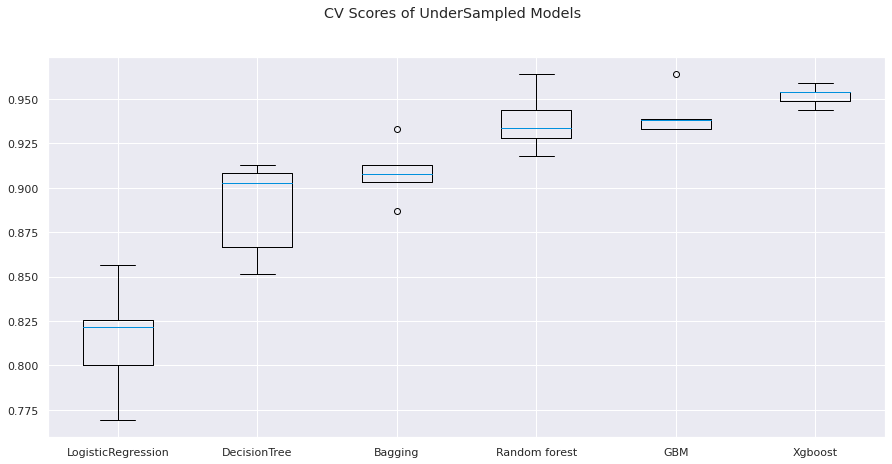

In [80]:
build_models_calculate_cv_metrics(X_train_under,y_train_under,"CV Scores of UnderSampled Models")

**Observation - Models built on UnderSampled data**

The cv scores of the models have improved when compared to the scores of the basic models.  

XGBoost, GradientBoost and RandomForest are the leaders and XGBoost retains the top place.


**The top 3 Models targeted for Tuning**

Overall, sampling (both Over and Under) has improved the recall metrics across all the 6 models in both the training as well as validation datasets.

1.   **XGBoost** consistently produced high metrics - Of the 3 XGBoost models, the one built using **OverSampled** data yeilded the best cv scores. The recall metric on the validation dataset looks good as well.
2.   GradingBoosting consistently produced high metrics and has a very small range of cv values. **GradientBoost** built using **OverSampled** data resulted in the highest cv scores. The recall metric on the validation dataset looks good as well.
3.   **RandomForest** generated improved metrics both with oversampling as well as undersampling. RandomForest built using **OverSampled** data returned the 
highest cv scores. The recall metric on the validation dataset looks good as well.



# Hyperparameter Tuning using RandomizedSearchCV

# Extreme Gradient Boosting Tuned using OverSampled Data

In [ ]:
%%time
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1,eval_metric='logloss')

# Grid of parameters to choose from
parameters = {'n_estimators':np.arange(50,150,50),
            'scale_pos_weight':[2,5,10],
            'learning_rate':[0.009,0.01,0.1,0.2,0.05],
            'gamma':[0,1,3,5],
            'subsample':[0.8,0.9,1],
            'max_depth':np.arange(1,5,1),
            'reg_lambda':[5,10]}

# Run the randomized search
grid_obj = RandomizedSearchCV(estimator=xgb_tuned, param_distributions=parameters, n_iter=50, scoring='recall', cv=5, random_state=1, n_jobs=-1, verbose=2)
grid_obj = grid_obj.fit(X_train_over, y_train_over)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train_over, y_train_over)

print("Best parameters are {} with CV score={}:" .format(grid_obj.best_params_,grid_obj.best_score_))

Fitting 5 folds for each of 50 candidates, totalling 250 fits


**Generate the metrics on training, validation and test data sets**

In [ ]:
xgb_tuned_score=get_metrics_score(xgb_tuned, X_train_over, y_train_over)
add_score_model(xgb_tuned_score)

In [ ]:
confusion_matrix_sklearn(xgb_tuned, X_train_over, y_train_over)

In [ ]:
confusion_matrix_sklearn(xgb_tuned, X_val, y_val)

In [ ]:
confusion_matrix_sklearn(xgb_tuned, X_test, y_test)

# Gradient Boosting Tuned using OverSampled Data

In [ ]:
%%time
# Choose the type of classifier. 
gb_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
params = {'n_estimators':[100,150,200],
            'max_features':[0.7,0.8,0.9,1],
            'subsample':[0.8,0.9,1],
            'max_depth':[3,4,5,6]
            }

# Run the randomized search
randomized_search = RandomizedSearchCV(estimator=gb_tuned, param_distributions=params, n_iter=20, scoring='recall', cv=3, random_state=1, n_jobs=-1, verbose=2)
randomized_search = randomized_search.fit(X_train_over, y_train_over)

# Set the clf to the best combination of parameters
gb_tuned = randomized_search.best_estimator_

# Fit the best algorithm to the data.
gb_tuned.fit(X_train_over, y_train_over)

print("Best parameters are {} with CV score={}:" .format(grid_obj.best_params_,grid_obj.best_score_))

**Generate the metrics on training, validation and test data sets**

In [ ]:
gb_tuned_score=get_metrics_score(gb_tuned, X_train_over, y_train_over)
add_score_model(gb_tuned_score)

In [ ]:
confusion_matrix_sklearn(gb_tuned, X_train_over, y_train_over)

In [ ]:
confusion_matrix_sklearn(gb_tuned, X_val, y_val)

In [ ]:
confusion_matrix_sklearn(gb_tuned, X_test, y_test)

# Random Forest Tuned with OverSampled Data

In [ ]:
%%time
# Choose the type of classifier. 
randomforest_tuned = RandomForestClassifier(class_weight={0:0.16,1:0.84},random_state=1)

parameters = {  
    'max_depth': list(np.arange(10,25,5)) + [None],
    'max_features': ['sqrt','log2',None],
    'min_samples_leaf': np.arange(1,15,5),
    'min_samples_split': np.arange(2, 20, 5),
    'n_estimators': np.arange(10,30,10)}


# Run the randomized search
grid = RandomizedSearchCV(estimator=randomforest_tuned, param_distributions=parameters, n_iter=50, scoring='recall', cv=5, random_state=1, n_jobs=-1, verbose=2)
grid = grid.fit(X_train_over, y_train_over)

# Set the clf to the best combination of parameters
randomforest_tuned = grid.best_estimator_

# Fit the best algorithm to the data. 
randomforest_tuned.fit(X_train_over, y_train_over)
print("Best parameters are {} with CV score={}:" .format(grid.best_params_,grid_obj.best_score_))

In [ ]:
randomforest_tuned_score=get_metrics_score(randomforest_tuned, X_train_over, y_train_over)
add_score_model(randomforest_tuned_score)

In [ ]:
confusion_matrix_sklearn(randomforest_tuned, X_train_over, y_train_over)

In [ ]:
confusion_matrix_sklearn(randomforest_tuned, X_val, y_val)

In [ ]:
confusion_matrix_sklearn(randomforest_tuned, X_test, y_test)

# Model Metric Matrix

In [ ]:
comparison_frame = pd.DataFrame({'Model':['ExtremeGradientBoosting Tuned - OverSampled',
                                          'GradientBoosting Tuned - OverSampled',
                                          'RandomForest Tuned - OverSampled'],
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train, 'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test,
                                          'Train_F1':f1_train, 'Test_F1':f1_test}) 

for col in comparison_frame.select_dtypes(include='float').columns.to_list():
    comparison_frame[col] = (round(comparison_frame[col] * 100, 0)).astype(int)
    
#Sorting models in decreasing order of test recall metric
comparison_frame.sort_values(by='Test_Recall',ascending=False)


**Conclusion drawn from Model Metric Matrix**

The Tuned Extreme Gradient Boosting Model gave us the best recall metrics - A complete 100 both on the training as well as the testing datasets. However it returned sub-optimal metrics for Accuracy, Precision and F1. GradientBoosting on the other hand, gave us a recall metric of 94 on the test data along with very high metrics across Accuracy(97), Precisision(88) and F1(91). **So making GradientBoosting Tuned model using OverSampled data as our final/production model.**

# Importance of features as rated by the Gradient Boost Model

In [ ]:
feature_names = list(X_train_over.columns)
importances = gb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

The total count of transacations is #1, followed by total transaction amount, total revolving monthly balance, then the total products count of the customer with the bank are the important features in predicting attrition.

In [ ]:
# create a scatterplot
sns.scatterplot(x=data['Total_Trans_Ct'], y=data['Attrition_Flag'])
plt.show()

In [ ]:
# create a scatterplot
sns.scatterplot(x=data['Total_Trans_Amt'], y=data['Attrition_Flag'])
plt.show()

In [ ]:
# create a scatterplot
sns.scatterplot(x=data['Total_Revolving_Bal'], y=data['Attrition_Flag'])
plt.show()

In [ ]:
# crosstabs
pd.crosstab(index=data["Attrition_Flag"], columns=data["Total_Relationship_Count"])

# Pipelines for productionizing the model


Pipeline is a means of automating the machine learning workflow by enabling data to be transformed and correlated into a model that can then be analyzed to achieve outputs. This type of ML pipeline makes the process of inputting data into the ML model fully automated.

Now, we have a final model. Let's use pipelines to put the model into production.

**Column Transformer**
We know that we can use pipelines to standardize the model building, but the steps in a pipeline are applied to each and every variable - how can we personalize the pipeline to perform different processing on different columns?
Column transformer allows different columns or column subsets of the input to be transformed separately and the features generated by each transformer will be concatenated to form a single feature space. This is useful for heterogeneous or columnar data, to combine several feature extraction mechanisms or transformations into a single transformer.


In [ ]:
#Encoding the target variable
pipeline_data= csv_data.copy()
pipeline_data['Attrition_Flag'] = pipeline_data['Attrition_Flag'].replace({"Attrited Customer": 1, "Existing Customer": 0})

In [ ]:
# Separating target variable from the independent features
X_prod = pipeline_data.drop(columns="Attrition_Flag")
y_prod = pipeline_data["Attrition_Flag"]


Now we already know the best model we need to process with, so we don't need to divide data into 3 sets - train, validation and test

In [ ]:
# Splitting the data into train and test sets
X_prod_train, X_prod_test, y_prod_train, y_prod_test = train_test_split(
    X_prod, y_prod, test_size=0.30, random_state=1, stratify=y
)
print(X_prod_train.shape, X_prod_test.shape)

**Verify the ratio of the class values in the target variable (84:16) is the same between the training and test datasets.**

In [ ]:
y_prod_train.value_counts(1)

In [ ]:
y_prod_test.value_counts(1)

**Steps that are involved in prepepping the data for model training**

*   Erroneous data in the Income_Category column needs to be rectified.
*   Missing values in the Marital_Status and Education_Level need to be imputed.
*   Education_Level, Card_Category and Income_Category need to go through oridnal encoding.
*   Gender and Marital_Status columns need to go through OneHot Encoding.

Building multiple transformers to take care of these steps.





**Custom Transformer**

Building a custom transformer to 

*   Drop the CLIENTNUM column which has all unique values and does not help with the model prediction
*   Replace the errorneous data in the Income_Category column with null values, so they could be imputed.
*   Replace the missing values in the numeric columns with mean values
*   Replace the missing values in the non-numeric columns with the most-frequent value.





In [ ]:
#ColumnTransformer returns numpy.array, so it can't have column attribute and so we cannot
#use an OrdinalEncoder after we have passed the data through a SimpleImputer. Hence avoiding
#using SimpleImputer and doing the imputing in the custom transformer

def myProcessingSteps(X_prod_train):
    #Dropping the column with all unique values
    X_prod_train.drop(columns=["CLIENTNUM"], inplace=True)

    # Replacing the values in Education column
    X_prod_train['Income_Category'].replace(to_replace="abc", value=np.NaN, inplace=True)

    
    # Imputing numeric columns
    for col in X_prod_train.select_dtypes(include=['number']):
      X_prod_train[col].fillna(X_prod_train[col].mean(), inplace=True)

    # Imputing categorical columns
    for col in X_prod_train.select_dtypes(include=['object']):
      X_prod_train[col].fillna(X_prod_train[col].mode()[0], inplace=True)
    
    return X_prod_train

**Create an instance of the Custom Transformer**

In [ ]:
# The function created for processing the data should be passed as an arugument in the FunctionTransformer
custom_transformer = FunctionTransformer(myProcessingSteps)

**Transformer to handle Ordinal Ecoding and OneHot Encoding**

In [ ]:
#ColumnTransformer returns numpy.array, so it can't have column attribute and so we cannot
#use an OrdinalEncoder after we have passed the data through a SimpleImputer. Hence avoiding
#using SimpleImputer and imputing within the custom transformer

#Create categories to instruct how ordinal encoder should work
education_order = ['Uneducated','High School','College','Graduate','Post-Graduate','Doctorate']
card_order = ["Blue", "Silver", "Gold", 'Platinum']
income_order = ['Less than $40K','$40K - $60K', '$60K - $80K','$80K - $120K', '$120K +']

#2nd Ordinal Encoding and One Hot Encoding
ordinal_ohe_transformer = ColumnTransformer([
        ('encode_education_level', OrdinalEncoder(categories=[education_order],handle_unknown='error'),['Education_Level']),
        ('encode_card_category', OrdinalEncoder(categories=[card_order],handle_unknown='error'),['Card_Category']),
        ('encode_income_category', OrdinalEncoder(categories=[income_order],handle_unknown='error'),['Income_Category']),
        ('ohe_transformer', OneHotEncoder(sparse=False, handle_unknown='ignore'),['Gender','Marital_Status'])
    ], remainder='passthrough',sparse_threshold=0)


**Generating Oversampled Data**

In [ ]:
smote = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)

**Setting the best model, Gradient Boosting in our case.**

In [ ]:
model = gb_tuned

Create the pipeline and pass the transformers in the right order

In [ ]:
pipe = ImbPipeline([
    ('custom_transformer', custom_transformer),
    ('ordinal_ohe_transformer', ordinal_ohe_transformer),
    ('smote', smote),
    ('model', model)
])

In [ ]:
# Display the hierarchy of the transformers in the Pipeline
from sklearn import set_config
set_config(display='diagram')


In [ ]:
#Fit the pipeline on training data
pipe.fit(X_prod_train, y_prod_train)


In [ ]:
#Calculate the recall store
recall_score(y_prod_test, pipe.predict(X_prod_test))

We successfully built a Pipeline using the Gradient Boosting Model. This concludes the building and validation of the Pipeline.

# Conclusion

The bank can run the model to achieve desired performance levels on new data, and also gain insights into the customer profiles of existing customers. 

# Actionable Insights

**Data Capture Enhancements**
1. There was imbalance in data, it contains only 16% attrited customers. This could be rectified before any future analysis.

2. The data capture issues resulted in Missing values in Marital Status and Education_Level, which are imputed with most frequent values in dataset. This adds to imbalance in the data. This should be rectified.

3. "abc" Category in Income_Level looks like typo for NULL Values and were also imputed using frequent values further creating one large segment of customers earning below $40 K. 

4. Capturing additional information related to Customer Employment, Living Status and Spending Pattern will help in smart imputation. 

**Feature Importance**

We observed in our analysis that the total tranaction count is the #1 feature of importance, followed by the total tranaction amount, month-to-month balance, then the total amount of products a customer holds with the bank in predicting whether a customer will attrit. The company should carefully consider these features for monitoring and setting thresholds for raising alerts. 

**Attrition Indicators**
Company should target customers who attrit based on their historical customer profile from this dataset (as a starting point). 

**The Attrited customers:**

   are primarily in the age group of 41 to 52


   have been with the bank between 2.5 to 3.5 years


   have not used the credit card for 2 to 3 months in the last 12 months


   have a credit limit between ~2K and ~10K


   have a revolving balance between 0 and 1.3K


   spend anywhere between ~1.9K to ~2.7K annually


   use the credit card between 37 to 51 times annually


   majority of them are married female graduates with income less than 40K.


    




# Recommendations

Card categories other than Blue could be promoted more.

Business can also tailor offers towards Female Customers to reduce attrition.

Business can focus on customer using Revolving Credit and curate specific offers for them to encourage loyalty to the bank.

Customers with Income more that $120K should be targeted to enhance their satisfaction and reduce attrition.

Customers with Doctorate degrees contribute more to the attrited customers. Business can use the Customer satisfaction survey data, implement findings and improve the retention rates.

Specific promotional and rewards programs can be created for different income groups.

Business has to also focus on customers that have not used their cards for more than 3 months in last one year. There are chances that these customers may close the card accounts.


